In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


In [62]:
data=pd.read_csv('My Uber Drives - 2016.csv',encoding='latin-1')

In [63]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [64]:
data.shape

(1156, 7)

# Data Pre-Processing

In [65]:
# fill null values

In [66]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [141]:
data['PURPOSE*'].fillna('NOT',inplace=True)

In [74]:
data.dropna(inplace=True)

In [76]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [77]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [78]:
data.duplicated().sum()

1

In [80]:
data.drop_duplicates(inplace=True)

In [81]:
data.duplicated().sum()

0

# change data type

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1154 non-null   object 
 1   END_DATE*    1154 non-null   object 
 2   CATEGORY*    1154 non-null   object 
 3   START*       1154 non-null   object 
 4   STOP*        1154 non-null   object 
 5   MILES*       1154 non-null   float64
 6   PURPOSE*     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [85]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'])
data['END_DATE*']=pd.to_datetime(data['END_DATE*'])

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1154 non-null   datetime64[ns]
 1   END_DATE*    1154 non-null   datetime64[ns]
 2   CATEGORY*    1154 non-null   object        
 3   START*       1154 non-null   object        
 4   STOP*        1154 non-null   object        
 5   MILES*       1154 non-null   float64       
 6   PURPOSE*     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [142]:
from datetime import datetime

In [144]:
data['Date']=pd.DatetimeIndex(data['START_DATE*']).date

In [172]:
data['Date']=pd.to_datetime(data['Date'])

In [147]:
data['Time']=pd.DatetimeIndex(data['START_DATE*']).hour

In [208]:
data['month']=data['Date'].dt.month_name()   # for month
data['day']=data['Date'].dt.day_name()     # for days in week

In [209]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,day,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Wednesday,January


# Q: which Category people book most ride

In [88]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [89]:
cpb=data.groupby('CATEGORY*').size().reset_index(name='count')
print(cpb)

  CATEGORY*  count
0  Business   1077
1  Personal     77


In [90]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    1077
Personal      77
Name: count, dtype: int64

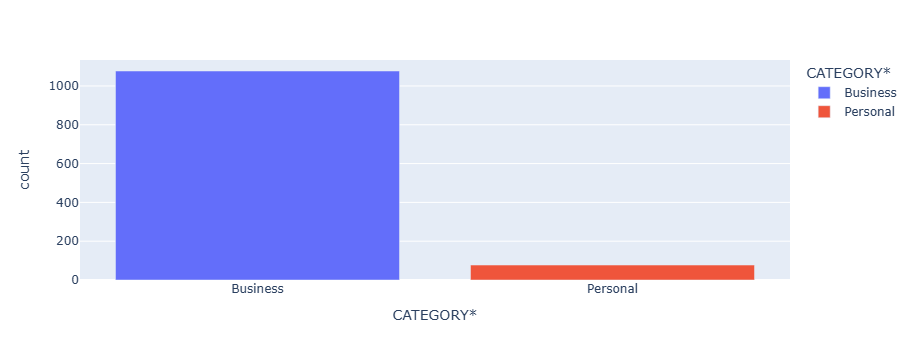

In [92]:
fig=px.bar(cpb,x='CATEGORY*',y='count',color='CATEGORY*')
fig.show()

# Q: For which purpose people book uber ride the most

In [93]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [108]:
p=pd.DataFrame()
print(p)

Empty DataFrame
Columns: []
Index: []


In [123]:
p=data['PURPOSE*']
print(p)

0        Meal/Entertain
1                   NOT
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1150            Meeting
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
Name: PURPOSE*, Length: 1154, dtype: object


In [124]:
p=p.to_frame()
print(p)

             PURPOSE*
0      Meal/Entertain
1                 NOT
2     Errand/Supplies
3             Meeting
4      Customer Visit
...               ...
1150          Meeting
1151   Temporary Site
1152          Meeting
1153   Temporary Site
1154   Temporary Site

[1154 rows x 1 columns]


In [130]:
p.columns=['purpose']
print(p)

              purpose
0      Meal/Entertain
1                 NOT
2     Errand/Supplies
3             Meeting
4      Customer Visit
...               ...
1150          Meeting
1151   Temporary Site
1152          Meeting
1153   Temporary Site
1154   Temporary Site

[1154 rows x 1 columns]


In [131]:
PURPOSE=p.groupby('purpose').size().reset_index(name='count')
print(PURPOSE)

            purpose  count
0    Airport/Travel      3
1   Between Offices     18
2       Charity ($)      1
3           Commute      1
4    Customer Visit    101
5   Errand/Supplies    128
6    Meal/Entertain    160
7           Meeting    186
8            Moving      4
9               NOT    502
10   Temporary Site     50


In [135]:
PURPOSE=PURPOSE[PURPOSE.purpose !='NOT'].sort_values(by=['count'],ascending=False)
print(PURPOSE)

            purpose  count
7           Meeting    186
6    Meal/Entertain    160
5   Errand/Supplies    128
4    Customer Visit    101
10   Temporary Site     50
1   Between Offices     18
8            Moving      4
0    Airport/Travel      3
2       Charity ($)      1
3           Commute      1


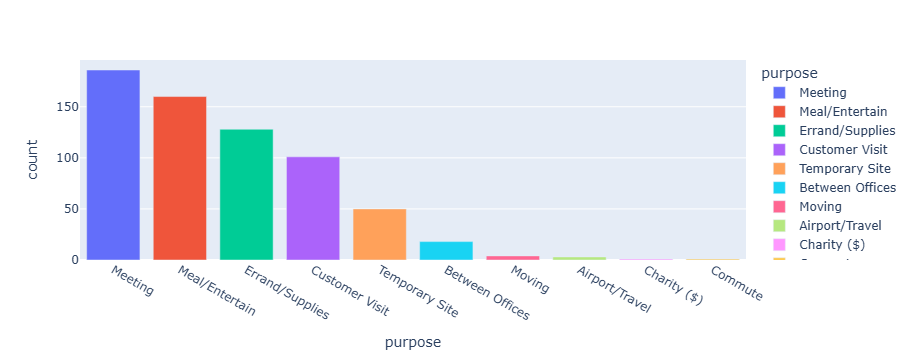

In [136]:
fig=px.bar(PURPOSE,x='purpose',y='count',color='purpose')
fig.show()

# Q: At what time people book most uber ride

In [137]:
data.columns


Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [149]:
data['Time']

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: Time, Length: 1154, dtype: int32

In [150]:
labels=['morning','Afternoon','Evening','Night']

In [153]:
Day_Night=pd.cut(x=data['Time'],bins=[0,10,15,19,24],labels=labels)
print(Day_Night)

0           Night
1         morning
2           Night
3         Evening
4       Afternoon
          ...    
1150      morning
1151    Afternoon
1152    Afternoon
1153        Night
1154        Night
Name: Time, Length: 1154, dtype: category
Categories (4, object): ['morning' < 'Afternoon' < 'Evening' < 'Night']


In [155]:
Day_Night=Day_Night.to_frame()
print(Day_Night)

           Time
0         Night
1       morning
2         Night
3       Evening
4     Afternoon
...         ...
1150    morning
1151  Afternoon
1152  Afternoon
1153      Night
1154      Night

[1154 rows x 1 columns]


In [156]:
Day_Night.columns=['zone']
print(Day_Night)

           zone
0         Night
1       morning
2         Night
3       Evening
4     Afternoon
...         ...
1150    morning
1151  Afternoon
1152  Afternoon
1153      Night
1154      Night

[1154 rows x 1 columns]


In [161]:
time=Day_Night.value_counts().reset_index(name='count')
print(time)

        zone  count
0  Afternoon    430
1    Evening    345
2    morning    182
3      Night    178


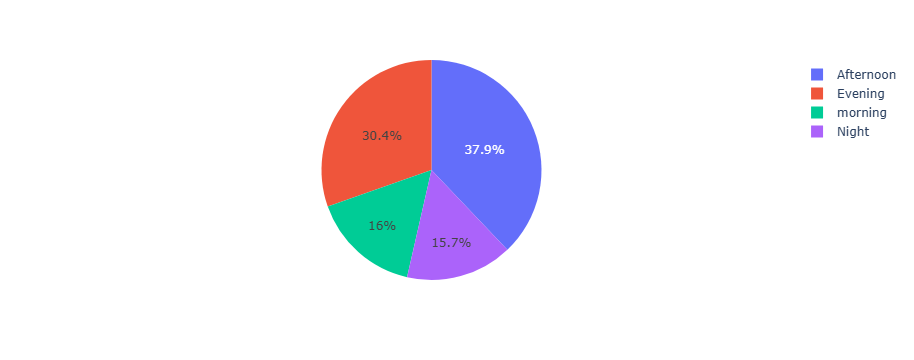

In [164]:
fig=px.pie(time,names='zone',values='count')
fig.show()

# Q: In Which months do people book Uber rides less frequently

In [211]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Date', 'Time', 'day', 'month'],
      dtype='object')

In [255]:
d=data.groupby('month').size().reset_index(name='count')
print(d)

        month  count
0       April     54
1      August    133
2    December    146
3    February    115
4     January     61
5        July    112
6        June    107
7       March    113
8         May     49
9    November    122
10    October    106
11  September     36


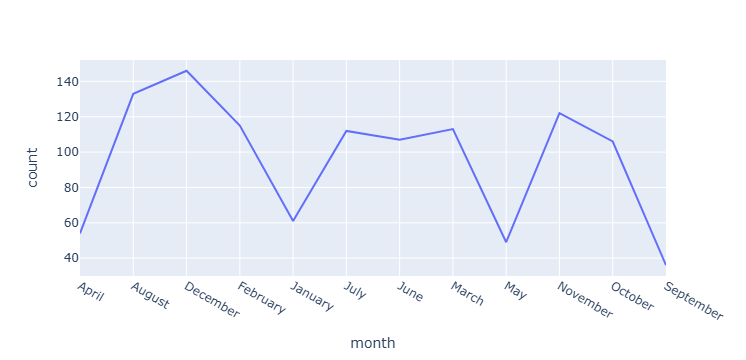

In [256]:
fig=px.line(d,x='month',y='count')
fig.show()

# Q: On Which days Of the week do people book most ride

In [257]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'Date', 'Time', 'day', 'month'],
      dtype='object')

In [261]:
days=data['day'].value_counts().reset_index(name='count')
print(days)

         day  count
0     Friday    206
1    Tuesday    175
2     Monday    174
3   Thursday    154
4   Saturday    150
5     Sunday    148
6  Wednesday    147


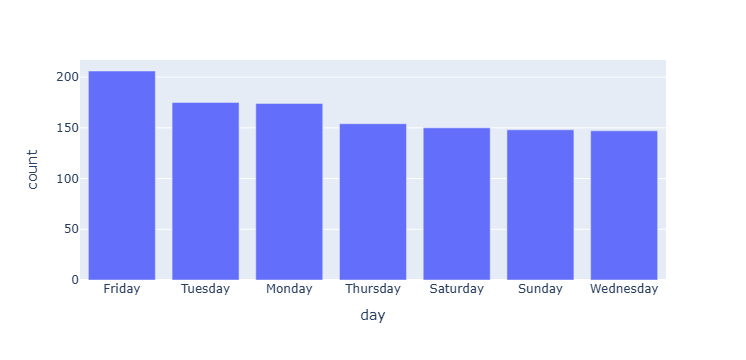

In [265]:
fig=px.bar(days,x='day',y='count')
fig.show()

In [266]:
data.describe(include='all')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,day,month
count,1154,1154,1154,1154,1154,1154.000000,1154,1154,1154.000000,1154,1154
unique,NaN,NaN,2,177,188,NaN,11,NaN,NaN,7,12
top,NaN,NaN,Business,Cary,Cary,NaN,NOT,NaN,NaN,Friday,December
freq,NaN,NaN,1077,201,202,NaN,502,NaN,NaN,206,146
mean,2016-07-17 00:07:01.611784960,2016-07-17 00:30:16.117850880,NaN,NaN,NaN,10.567418,NaN,2016-07-16 08:56:34.107452416,14.688908,NaN,NaN
min,2016-01-01 21:11:00,2016-01-01 21:17:00,NaN,NaN,NaN,0.500000,NaN,2016-01-01 00:00:00,0.000000,NaN,NaN
25%,2016-03-31 20:23:30,2016-03-31 20:52:00,NaN,NaN,NaN,2.900000,NaN,2016-03-31 06:00:00,12.000000,NaN,NaN
50%,2016-07-21 17:29:30,2016-07-21 17:37:00,NaN,NaN,NaN,6.000000,NaN,2016-07-21 00:00:00,15.000000,NaN,NaN
75%,2016-10-27 21:16:15,2016-10-27 21:34:30,NaN,NaN,NaN,10.400000,NaN,2016-10-27 00:00:00,18.000000,NaN,NaN
max,2016-12-31 22:08:00,2016-12-31 23:51:00,NaN,NaN,NaN,310.300000,NaN,2016-12-31 00:00:00,23.000000,NaN,NaN
